In [1]:
import numpy as np 
import matplotlib.pyplot as plt

pics = np.load("images.npy", allow_pickle=False)

In [34]:
class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K, epochs):
        self.K = K
        self.means = [np.random.rand(28,28) for i in range(K)]
        self.epochs = epochs
        self.costs = [None for i in range(self.epochs)]

    def __L2(self, u, v):
        return np.linalg.norm(np.subtract(u,v))

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # assign all points to the first class
        classes = [0 for i in range(X.shape[0])]

        for k in range(self.epochs):
            for i in range(X.shape[0]):
                # update classes of each data point
                distances = [self.__L2(X[i], mean) for mean in self.means]
                classes[i] = np.argmin(distances)

            for i in range(self.K):
                # update means of each class
                if len(X[np.array(classes) == i]) != 0:
                    self.means[i] = np.mean(X[np.array(classes) == i], axis=0)

            # calcualte cost... first cost omitted, is that okay?
            cost = 0
            for i in range(X.shape[0]):
                cost += self.__L2(self.means[classes[i]], X[i]) 
            self.costs[k] = cost


    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.means

    def visualize(self):
        plt.figure()
        plt.plot(np.arange(self.epochs), self.costs)
        plt.suptitle("Objective Function vs. Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Objective")
        plt.show()

    def final_objective(self):
        return self.costs[-1]

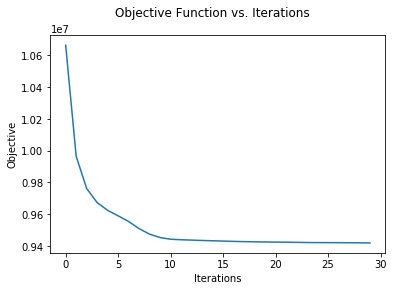

In [35]:
K = 10
KMeansClassifier = KMeans(K=10, epochs = 30) #, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.visualize()

In [9]:
costs = []
spreads = []
for i in range(2,16):
    print(i)
    costs_for_given_k = []
    for j in range(6):
        KMeansC = KMeans(K=i, epochs=15)
        KMeansC.fit(pics)
        costs_for_given_k.append(KMeansC.final_objective())
    costs.append(np.mean(costs_for_given_k))
    spreads.append(max(costs_for_given_k) - min(costs_for_given_k))

2
3
4
5
6
7
8
9
10
11
12
13
14
15


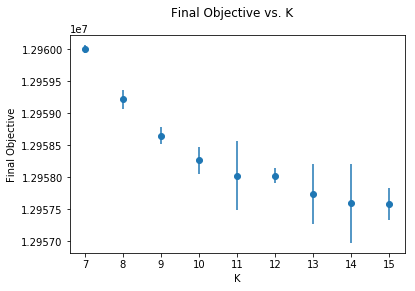

In [20]:
plt.figure()
plt.errorbar(range(7,16), costs[5:], yerr = spreads[5:], fmt='o')
plt.suptitle("Final Objective vs. K")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

In [12]:
spreads

[0.0,
 84.90979281999171,
 53.945518366992474,
 18.385168086737394,
 186.5695740263909,
 58.71096871048212,
 146.61893628910184,
 132.77242951467633,
 212.9321308992803,
 535.9977124556899,
 117.58073861896992,
 464.1235339343548,
 617.9103497359902,
 255.46847830154002]

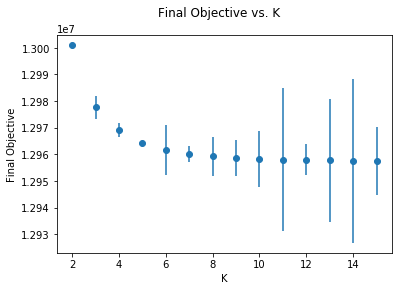

In [25]:
plt.figure()
plt.errorbar(range(2,16), costs, yerr = np.multiply(50,spreads), fmt='o')
plt.suptitle("Final Objective vs. K")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

In [26]:
costs1 = []
spreads1 = []
for i in range(2,16):
    print(i)
    costs_for_given_k1 = []
    for j in range(10):
        KMeansC = KMeans(K=i, epochs=18)
        KMeansC.fit(pics)
        costs_for_given_k1.append(KMeansC.final_objective())
    costs1.append(np.mean(costs_for_given_k1))
    spreads1.append(max(costs_for_given_k1) - min(costs_for_given_k1))

2
3
4
5
6
7
8
9
10
11
12
13
14
15


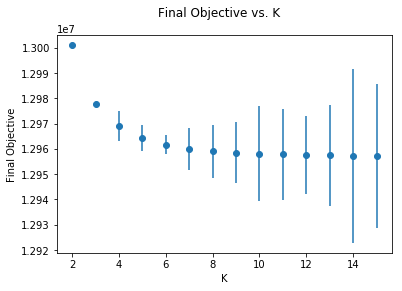

In [27]:
plt.figure()
plt.errorbar(range(2,16), costs1, yerr = np.multiply(50,spreads1), fmt='o')
plt.suptitle("Final Objective vs. K")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

In [46]:
costs2 = []
spreads2 = []
for i in range(2,16):
    print(i)
    costs_for_given_k2 = []
    for j in range(10):
        KMeansC = KMeans(K=i, epochs=15)
        KMeansC.fit(pics)
        costs_for_given_k2.append(KMeansC.final_objective())
    costs2.append(np.mean(costs_for_given_k2))
    spreads2.append(np.var(costs_for_given_k2))

2
3
4
5
6
7
8
9
10
11
12
13
14
15


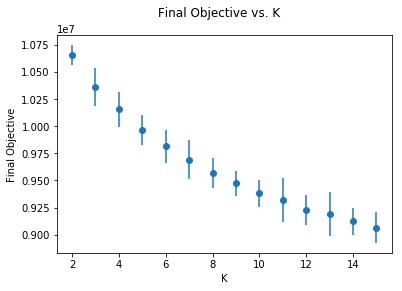

In [54]:
plt.figure()
plt.errorbar(range(2,16), costs2, yerr = np.multiply(5,np.sqrt(spreads2)), fmt='o')
plt.suptitle("Final Objective vs. K")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

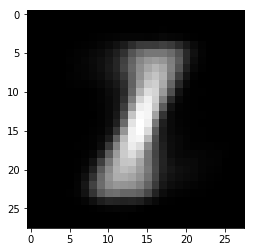

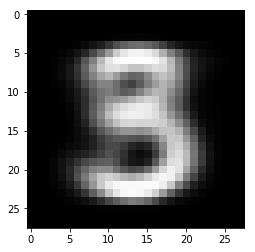

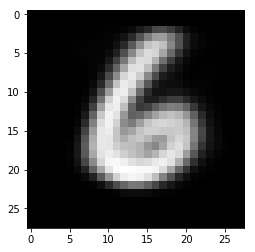

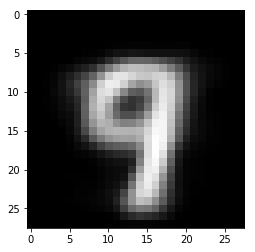

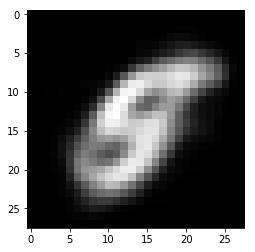

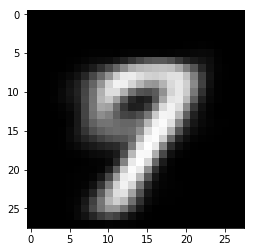

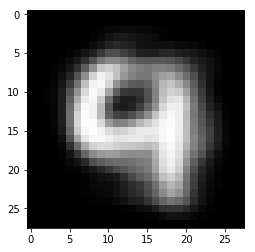

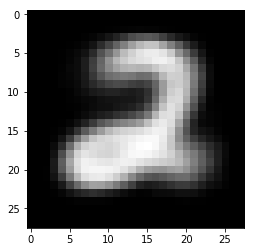

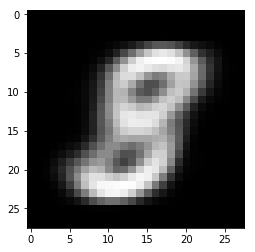

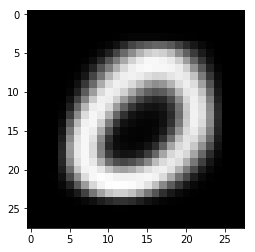

In [38]:
images = KMeansClassifier.get_mean_images()
for k in range(10):
    plt.figure()
    plt.imshow(images[k].reshape(28,28), cmap='Greys_r')
    plt.show()

In [92]:
standardized = [None for i in range(pics.shape[0])]


mean = np.mean(pics, axis = 0)
std = np.std(pics, axis = 0)
std[std == 0] = 1

for i, X in enumerate(pics):
    standardized[i] = np.divide(np.subtract(X, mean), std)
standardized = np.array(standardized) 

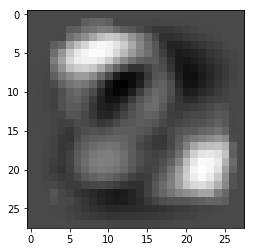

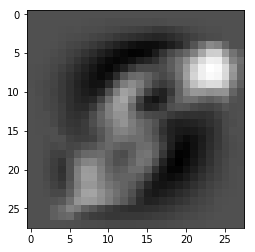

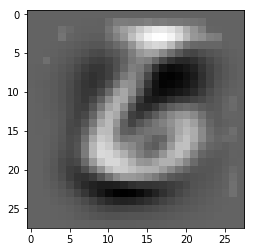

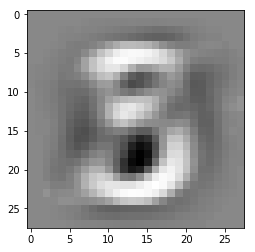

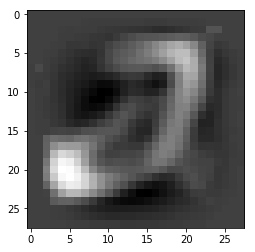

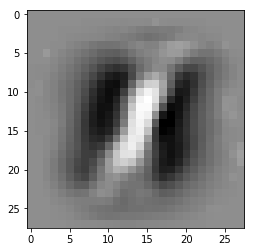

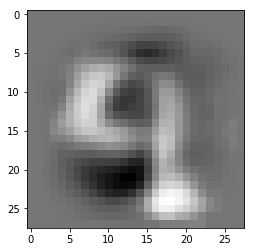

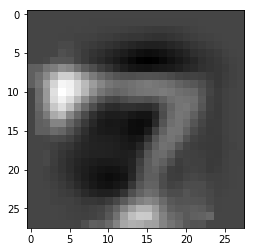

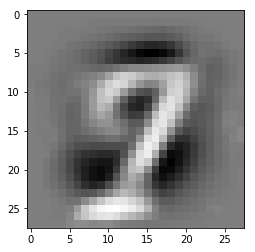

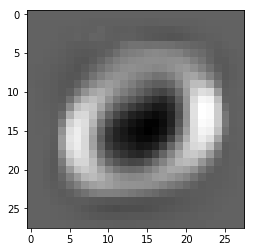

In [93]:
K = 10
KMeansClassifier = KMeans(K=10, epochs = 30)
KMeansClassifier.fit(standardized)

images_standardized = KMeansClassifier.get_mean_images()
for k in range(10):
    plt.figure()
    plt.imshow(images_standardized[k].reshape(28,28), cmap='Greys_r')
    plt.show()

In [125]:
class KMeans1(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
        self.means = [np.random.rand(28,28) for i in range(K)]
        self.costs = []

    def __L2(self, u, v):
        return np.linalg.norm(np.subtract(u,v))

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # assign all points to the first class
        classes = [0 for i in range(X.shape[0])]
        old = None
        
        while True:
            for i in range(X.shape[0]):
                # update classes of each data point
                distances = [self.__L2(X[i], mean) for mean in self.means]
                classes[i] = np.argmin(distances)
            
            for i in range(self.K):
                # update means of each class
                if len(X[np.array(classes) == i]) != 0:
                    self.means[i] = np.mean(X[np.array(classes) == i], axis=0)

            # calcualte cost... first cost omitted, is that okay?
            cost = 0
            for i in range(X.shape[0]):
                cost += self.__L2(self.means[classes[i]], X[i]) 
            self.costs.append(cost)
            
            if np.round_(cost) == old:
                break
            old = np.round_(cost)


    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.means

    def visualize(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.suptitle("Objective Function vs. Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Objective")
        plt.show()

    def final_objective(self):
        return self.costs[-1]

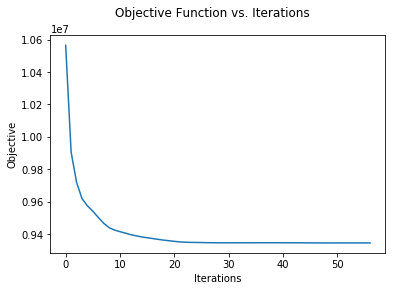

In [136]:
K = 10
KMeansClassifier = KMeans1(K=10) #, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.visualize()

In [133]:
costs3 = []
spreads3 = []
for i in range(2,16):
    print(i)
    costs_for_given_k3 = []
    for j in range(10):
        KMeansC = KMeans1(K=i)
        KMeansC.fit(pics)
        costs_for_given_k3.append(KMeansC.final_objective())
    costs3.append(np.mean(costs_for_given_k3))
    spreads3.append(np.var(costs_for_given_k3))

2
3
4
5
6
7
8
9
10
11
12
13
14
15


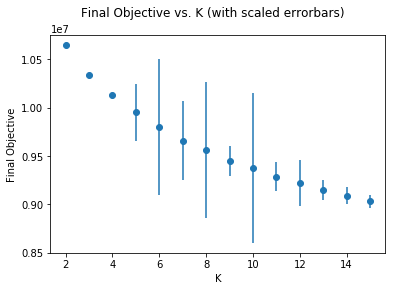

In [147]:
plt.figure()
plt.errorbar(range(2,16), costs3, yerr = np.multiply(.001,spreads3), fmt='o')
plt.suptitle("Final Objective vs. K (with scaled errorbars)")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

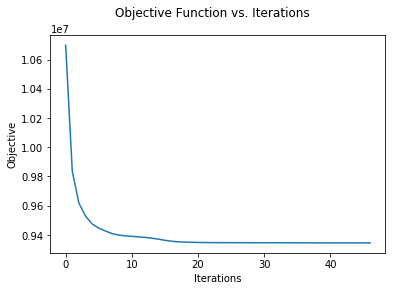

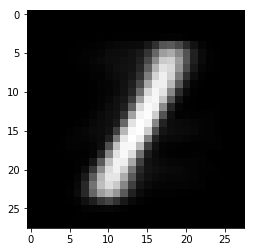

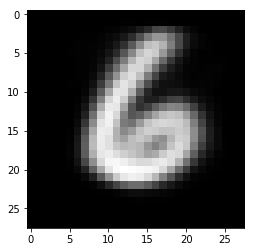

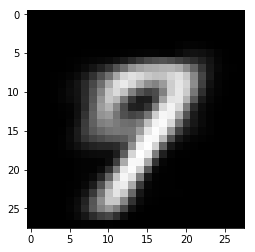

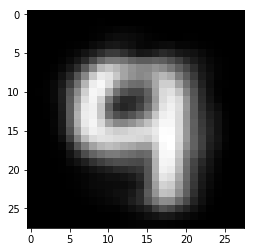

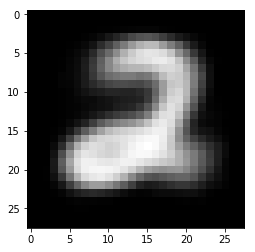

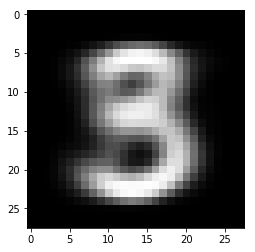

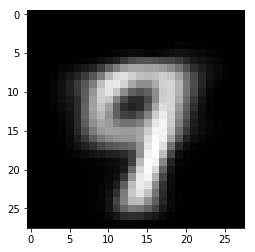

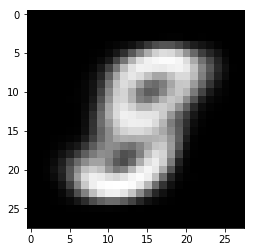

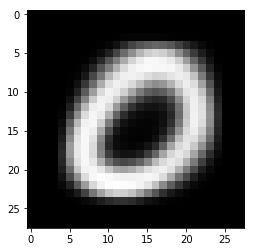

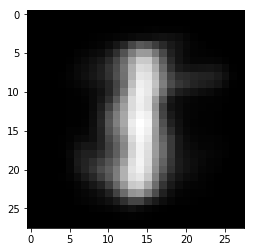

In [151]:
K = 10
KMeansClassifier = KMeans1(K=10) #, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.visualize()

images = KMeansClassifier.get_mean_images()
for k in range(10):
    plt.figure()
    plt.imshow(images[k].reshape(28,28), cmap='Greys_r')
    plt.show()

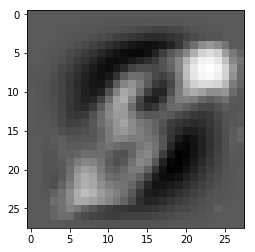

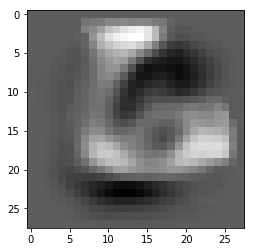

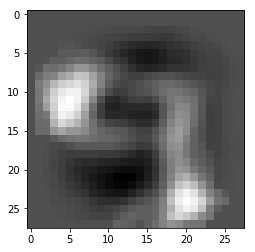

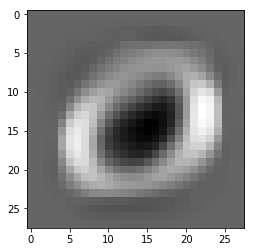

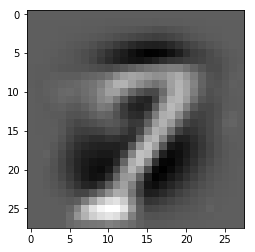

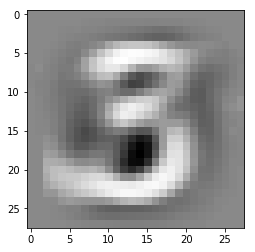

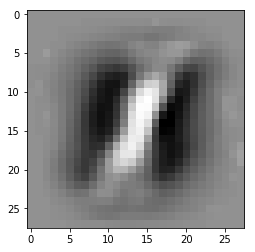

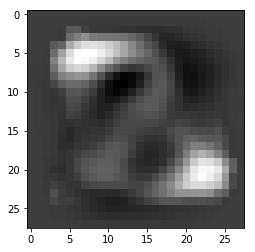

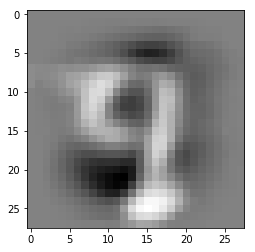

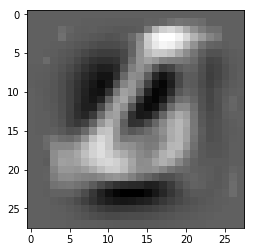

In [156]:
K = 10
KMeansClassifier = KMeans1(K=10)
KMeansClassifier.fit(standardized)

images_standardized = KMeansClassifier.get_mean_images()
for k in range(10):
    plt.figure()
    plt.imshow(images_standardized[k].reshape(28,28), cmap='Greys_r')
    plt.show()

In [161]:
class KMeans1(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
        self.means = [np.random.rand(28,28) for i in range(K)]
        self.costs = []

    def __L2(self, u, v):
        return np.linalg.norm(np.subtract(u,v))

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        # assign all points to the first class
        classes = [0 for i in range(X.shape[0])]
        
        while True:
            num_changed = 0
            for i in range(X.shape[0]):
                # update classes of each data point
                distances = [self.__L2(X[i], mean) for mean in self.means]
                new = np.argmin(distances)
                if classes[i] != new:
                    classes[i] = new
                    num_changed += 1
            
            for i in range(self.K):
                # update means of each class
                if len(X[np.array(classes) == i]) != 0:
                    self.means[i] = np.mean(X[np.array(classes) == i], axis=0)

            # calcualte cost... first cost omitted, is that okay?
            cost = 0
            for i in range(X.shape[0]):
                cost += self.__L2(self.means[classes[i]], X[i]) 
            self.costs.append(cost)
            
            if num_changed == 0:
                break


    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.means

    def visualize(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.suptitle("Objective Function vs. Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Objective")
        plt.show()

    def final_objective(self):
        return self.costs[-1]

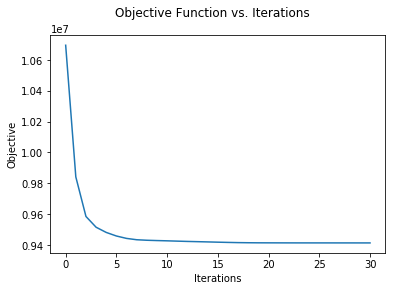

In [162]:
K = 10
KMeansClassifier = KMeans1(K=10) #, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.visualize()

In [163]:
costs3 = []
spreads3 = []
for i in range(2,16):
    print(i)
    costs_for_given_k3 = []
    for j in range(10):
        KMeansC = KMeans1(K=i)
        KMeansC.fit(pics)
        costs_for_given_k3.append(KMeansC.final_objective())
    costs3.append(np.mean(costs_for_given_k3))
    spreads3.append(np.var(costs_for_given_k3))

2
3
4
5
6
7
8
9
10
11
12
13
14
15


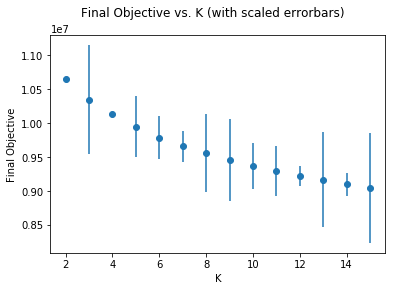

In [165]:
plt.figure()
plt.errorbar(range(2,16), costs3, yerr = np.multiply(.0008,spreads3), fmt='o')
plt.suptitle("Final Objective vs. K (with scaled errorbars)")
plt.xlabel("K")
plt.ylabel("Final Objective")
plt.show()

In [166]:
spreads3

[89063.22583299017,
 1003620575.7369173,
 16698951.432417989,
 561357979.7242066,
 402331434.8870822,
 286728598.3401793,
 716536239.9463236,
 759023658.82726,
 427097557.9852477,
 456724475.2039014,
 190884337.31076437,
 875662100.2402127,
 214535261.91708952,
 1012772240.1363313]